In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# predict_proba() gives the probability estimates for each class for each observation
# In a binary classification, it returns two columns: probability of class 0 and 
# probability of class 1. The second column (index 1) corresponds to the positive 
# class.
# For example, if you have a logistic regression model named 'model' and    
# you want to get the probability estimates for a dataset 'X_test', you would do:
# model.predict_proba(X_test)[:, 1] 
# This gives the probabilities for the positive class 
# for each observation in X_test.
# You can then use these probabilities to plot the ROC curve or calculate AUC.


# predict() gives the predicted class labels directly based on a default threshold 
# (usually 0.5 for binary classification).
# For example, using the same logistic regression model 'model' and dataset 'X_test':
# model.predict(X_test)
# This gives the predicted class labels (0 or 1) for each observation in X_test.
# You would use predict() when you want to know the final predicted class labels
# for your observations, rather than the probabilities.
# In summary, use predict_proba() when you need probability estimates for
# further analysis (like ROC/AUC), and use predict() when you need the final
# class predictions.

In [4]:
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path+'deposit.csv', index_col = 0)

In [5]:
df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 2065031284 to 2086934257
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   job_admin            45211 non-null  int64
 2   job_blue-collar      45211 non-null  int64
 3   job_entrepreneur     45211 non-null  int64
 4   job_housemaid        45211 non-null  int64
 5   job_management       45211 non-null  int64
 6   job_retired          45211 non-null  int64
 7   job_self-employed    45211 non-null  int64
 8   job_services         45211 non-null  int64
 9   job_student          45211 non-null  int64
 10  job_technician       45211 non-null  int64
 11  job_unemployed       45211 non-null  int64
 12  job_unknown          45211 non-null  int64
 13  marital_divorced     45211 non-null  int64
 14  marital_married      45211 non-null  int64
 15  marital_single       45211 non-null  int64
 16  education_pri

(45211, 35)

In [7]:
df.head()

,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,channel_telephone,channel_unknown,duration,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
accnum,,,,,,,,,,,,,,,,,,,,,
2065031284,58,0,0,0,0,1,0,0,0,0,...,0,1,261,-1,0,0,0,0,1,0
2051283096,44,0,0,0,0,0,0,0,0,0,...,0,1,151,-1,0,0,0,0,1,0
2029034586,33,0,0,1,0,0,0,0,0,0,...,0,1,76,-1,0,0,0,0,1,0
2070859436,47,0,1,0,0,0,0,0,0,0,...,0,1,92,-1,0,0,0,0,1,0
2098635102,33,0,0,0,0,0,0,0,0,0,...,0,1,198,-1,0,0,0,0,1,0


In [8]:
round(df['deposit'].mean(),3)

np.float64(0.117)

In [10]:
y=df['deposit']
X=df.drop(columns=['deposit'])

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 4000)
clf.fit(X,y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
y_pred = clf.predict(X)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y,y_pred)

array([[38989,   933],
       [ 3598,  1691]])

In [14]:
acc = round((y == y_pred).mean(),3)
print(acc)

0.9


In [ ]:
acc1 = round((y_pred[y == 1]).mean(),3)
acc0 = round((1-y_pred[y==0]).mean(),3) 

0.32
0.977


In [20]:
acc, acc1, acc0

(np.float64(0.9), np.float64(0.32), np.float64(0.977))

In [27]:
df['score']= clf.predict_proba(X)[:,1]
df[['deposit','score']].head()

,deposit,score
accnum,,
2065031284,0,0.021602
2051283096,0,0.013944
2029034586,0,0.003391
2070859436,0,0.008085
2098635102,0,0.039822


In [28]:
df['score'].describe()

count    45211.000000
mean         0.117018
std          0.177810
min          0.002178
25%          0.023654
50%          0.052321
75%          0.114070
max          1.000000
Name: score, dtype: float64

Text(0.5, 0, 'Subscription Score')

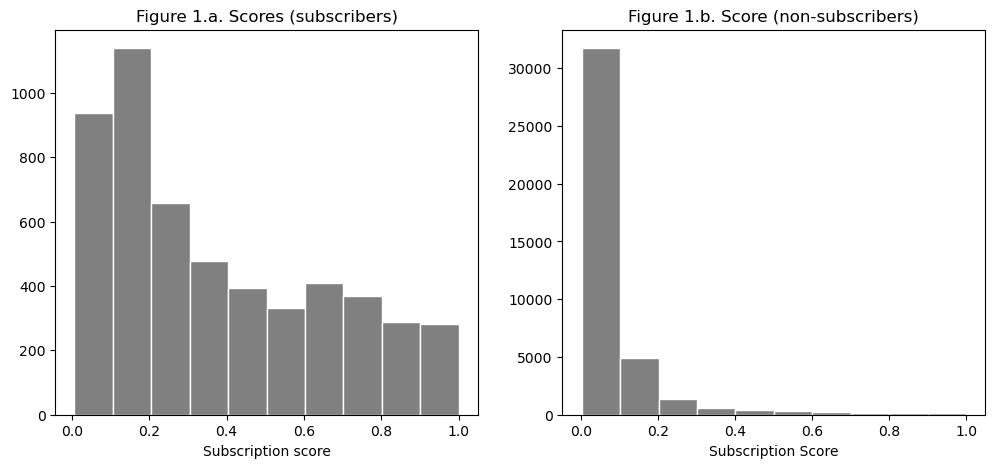

In [30]:
from matplotlib import pyplot as plt 
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(df['score'][y==1], color = 'gray', edgecolor = 'white', )
plt.title('Figure 1.a. Scores (subscribers)')
plt.xlabel('Subscription score')

plt.subplot(1,2,2)
plt.hist(df['score'][y==0], color='gray', edgecolor ='white')
plt.title('Figure 1.b. Score (non-subscribers)')
plt.xlabel('Subscription Score')

In [31]:
y_pred = (df['score'] > 0.11).astype(int)

In [32]:
confusion_matrix(y,y_pred)

array([[32505,  7417],
       [  990,  4299]])

In [33]:
acc = round((y==y_pred).mean(),3)
acc1 = round(y_pred[y==1].mean(),3)
acc0 = round((1-y_pred[y==0]).mean(),3)
acc, acc1, acc0 

(np.float64(0.814), np.float64(0.813), np.float64(0.814))

In [34]:
#Q4. Target of 4,000 subscriptions

In [46]:
df = df.sort_values('score',ascending = False)
df[['deposit', 'score']] 

,deposit,score
accnum,,
2084617209,0,1.000000
2096318570,1,0.999988
2054970681,0,0.999986
2064903718,0,0.999965
2078910432,0,0.999960
...,...,...
2064928371,0,0.002547
2038624917,0,0.002491
2009467351,0,0.002477


In [52]:
df['cum_subscription'] = df['deposit'].cumsum()
df[['deposit','score','cum_subscription']]

,deposit,score,cum_subscription
accnum,,,
2084617209,0,1.000000,0
2096318570,1,0.999988,1
2054970681,0,0.999986,1
2064903718,0,0.999965,1
2078910432,0,0.999960,1
...,...,...,...
2064928371,0,0.002547,5289
2038624917,0,0.002491,5289
2009467351,0,0.002477,5289


In [53]:
(df['cum_subscription'] < 4000).sum() + 1

np.int64(9871)

In [55]:
call_list = df.index[:10000]
call_list

Index([2084617209, 2096318570, 2054970681, 2064903718, 2078910432, 2041730862,
       2071098526, 2037940512, 2032450716, 2008541793,
       ...
       2023547980, 2073521049, 2029618573, 2002618495, 2041963502, 2032805491,
       2041275089, 2097315402, 2012043897, 2002687591],
      dtype='int64', name='accnum', length=10000)

In [56]:
df['cum_subscription'][call_list[9999]]

np.int64(4018)

In [57]:
data = df.copy()

In [65]:
positives = data[data['deposit'] == 1]
negatives = data[data['deposit'] == 0]
len(positives), len(negatives)

(5289, 39922)

In [66]:
negatives_under = negatives.sample(n=len(positives), random_state = 42)

In [67]:
len(positives), len(negatives_under)

(5289, 5289)

In [72]:
data_adj_under = pd.concat([positives, negatives_under])
data_adj_under.head()

,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,duration,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit,score,cum_subscription
accnum,,,,,,,,,,,,,,,,,,,,,
2096318570,59,0,0,0,0,1,0,0,0,0,...,3881,-1,0,0,0,0,1,1,0.999988,1
2037940512,36,0,0,0,0,0,0,1,0,0,...,3253,-1,0,0,0,0,1,1,0.999853,2
2032450716,53,1,0,0,0,0,0,0,0,0,...,3102,-1,0,0,0,0,1,1,0.999849,3
2008541793,28,1,0,0,0,0,0,0,0,0,...,3183,-1,0,0,0,0,1,1,0.999789,4
2095471620,68,0,0,0,0,0,1,0,0,0,...,2062,257,1,0,0,1,0,1,0.999750,5


In [73]:
y_u = data_adj_under['deposit']
x_u = data_adj_under.drop(columns = ['deposit','score','cum_subscription'])

In [74]:
clf_u = LogisticRegression(max_iter = 4000)
clf_u.fit(x_u, y_u)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [77]:
y_u_pred = clf_u.predict(x_u)
confusion_matrix(y_u, y_u_pred)

array([[4411,  878],
       [1159, 4130]])

In [80]:
acc = round((y_u==y_u_pred).mean(),3)
acc1 = round(y_u_pred[y_u==1].mean(),3)
acc0 = round((1 - y_u_pred[y_u == 0]).mean(), 3)
acc, acc1, acc0

(np.float64(0.807), np.float64(0.781), np.float64(0.834))

In [ ]:
#Oversampling exercise HOMEWORK Question 2

In [81]:
len(positives), len(negatives)

(5289, 39922)

In [83]:
positives_over = positives.sample(n=len(negatives), replace = True, random_state = 42)
len(positives_over), len(negatives)

(39922, 39922)

In [84]:
data_adj_over = pd.concat([positives_over,negatives])
data_adj_over.head()

,age,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,duration,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit,score,cum_subscription
accnum,,,,,,,,,,,,,,,,,,,,,
2041630729,40,0,1,0,0,0,0,0,0,0,...,998,-1,0,0,0,0,1,1,0.721828,861
2084562713,44,1,0,0,0,0,0,0,0,0,...,80,-1,0,0,0,0,1,1,0.027089,5227
2072143069,39,0,0,0,0,0,0,0,0,0,...,171,-1,0,0,0,0,1,1,0.033955,5192
2009231586,65,1,0,0,0,0,0,0,0,0,...,310,-1,0,0,0,0,1,1,0.152129,3773
2029065731,68,0,0,0,0,0,1,0,0,0,...,373,-1,0,0,0,0,1,1,0.220154,3093


In [85]:
y_o = data_adj_over['deposit']
x_o = data_adj_over.drop(columns = ['deposit','score','cum_subscription'])

In [87]:
clf_o = LogisticRegression(max_iter = 10000)
clf_o.fit(x_o, y_o)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [90]:
y_o_pred = clf_o.predict(x_o)
confusion_matrix(y_o, y_o_pred)

array([[33392,  6530],
       [ 8541, 31381]])

In [91]:
acc_o = round((y_o==y_o_pred).mean(),3)
acc1_o = round(y_o_pred[y_o==1].mean(),3)
acc0_o = round((1 - y_o_pred[y_o == 0]).mean(), 3)
acc_o, acc1_o, acc0_o

(np.float64(0.811), np.float64(0.786), np.float64(0.836))